In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
sns.set(style = "whitegrid", rc = {"figure.figsize": (10, 8)})

In [35]:
df = pd.read_csv('StudentsPerformance.csv')

In [36]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [38]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Continuous bivariate analysis

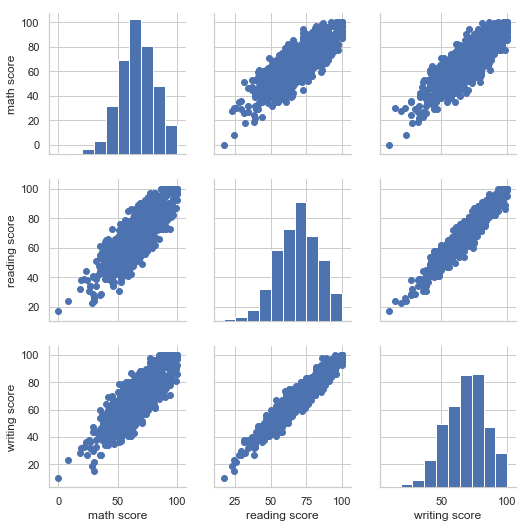

In [39]:
g = sns.PairGrid(df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [8]:
df_corr = df.corr()

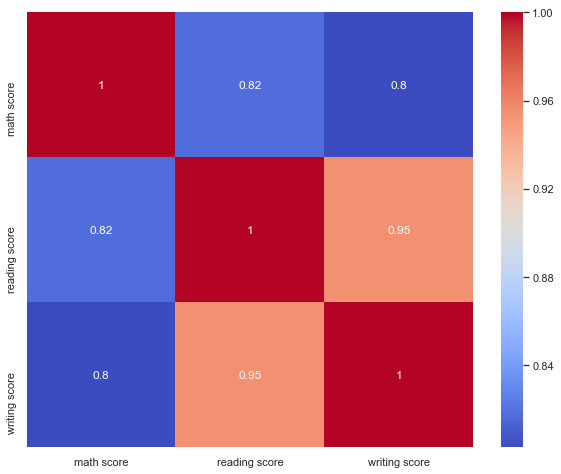

In [9]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

In [40]:
def passcheck(row):
    if row['math score']>70 and row['reading score']>70 and row['writing score']>70:
        return 1
    else:
        return 0

In [41]:
#This is the outcome variable
df['Passed All'] = df.apply(passcheck, axis=1)

In [42]:
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B                 high school      standard   
13     male        group A                some college      standard   
14   female        group A             master's degree      standard   
15   female        group C            some high school      standard   
16     male        group C                 high school      standard   
17   female        group B            some high school  free/reduced   
18     male        group C             master's degree  free/reduced   
19   female        group C          associate's degree  free/reduced   
20     male        group D                 high school      standard   
21   female        group B                some college  free/reduced   
22     male        group D                some college      standard   
23   female        group C            some high school      standard   
24     male        group D           bachelor's degree  free/reduced   
25     male        group A             master's degree  free/reduced   
26     male        group B                some college      standard   
27   female        group C           bachelor's degree      standard   
28     male        group C                 high school      standard   
29   female        group D             master's degree      standard   
..      ...            ...                         ...           ...   
970  female        group D           bachelor's degree      standard   
971    male        group C            some high school      standard   
972  female        group A                 high school  free/reduced   
973  female        group D                some college  free/reduced   
974  female        group A                some college      standard   
975  female        group C                some college      standard   
976    male        group B                some college  free/reduced   
977    male        group C          associate's degree      standard   
978    male        group D                 high school      standard   
979  female        group C          associate's degree      standard   
980  female        group B                 high school  free/reduced   
981    male        group D            some high school      standard   
982    male        group B            some high school      standard   
983  female        group A                some college      standard   
984  female        group C            some high school      standard   
985    male        group A                 high school      standard   
986  female        group C          associate's degree      standard   
987    male        group E            some high school      standard   
988  female        group A            some high school  free/reduced   
989  female        group D                some college  free/reduced   
990    male        group E                 high school  free/reduced   
991  female        group B            some high school      standard   
992  female        group D          associate's degree  free/reduced   
993  female        group D           bachelor

Categorical variables

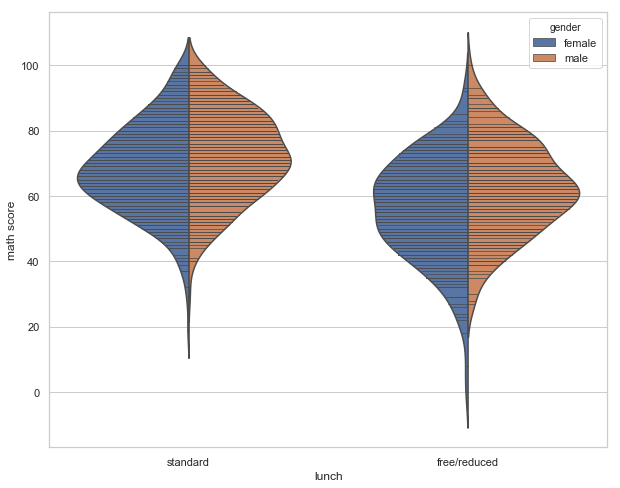

In [28]:
sns.violinplot(x='lunch', y='math score', data=df, hue='gender', split=True, inner='stick')

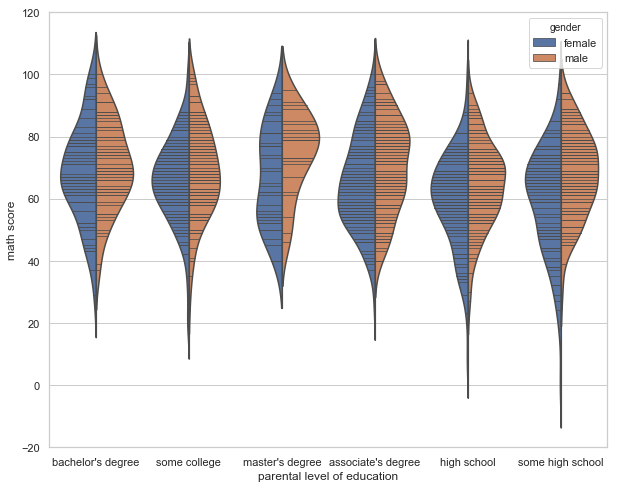

In [29]:
sns.violinplot(x='parental level of education', y='math score', data=df, hue='gender', split=True, inner='stick')

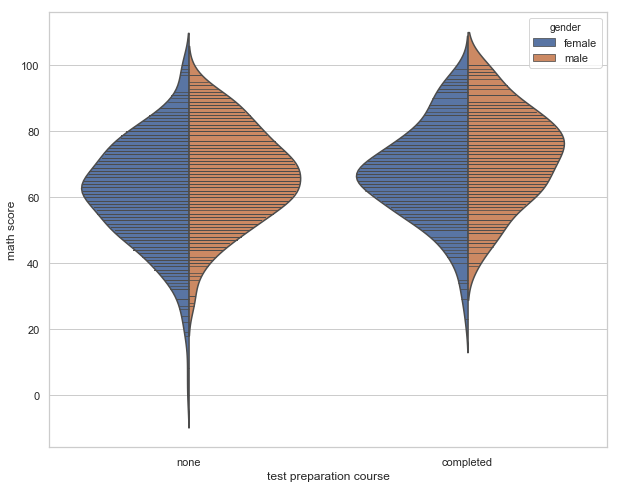

In [30]:
sns.violinplot(x='test preparation course', y='math score', data=df, hue='gender', split=True, inner='stick')

Feature Engineering

In [44]:
features = pd.get_dummies(df)

In [46]:
features.head()

math score  reading score  writing score  Passed All  gender_female  \
0          72             72             74           1              1   
1          69             90             88           0              1   
2          90             95             93           1              1   
3          47             57             44           0              0   
4          76             78             75           1              0   

   gender_male  race/ethnicity_group A  race/ethnicity_group B  \
0            0                       0                       1   
1            0                       0                       0   
2            0                       0                       1   
3            1                       1                       0   
4            1                       0                       0   

   race/ethnicity_group C  race/ethnicity_group D  \
0                       0                       0   
1                       1                       0   
2                       0                       0   
3                       0                       0   
4                       1                       0   

               ...               \
0              ...                
1              ...                
2              ...                
3              ...                
4              ...                

   parental level of education_associate's degree  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   parental level of education_bachelor's degree  \
0                                              1   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   parental level of education_high school  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   parental level of education_master's degree  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            0   

   parental level of education_some college  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

   parental level of education_some high school  lunch_free/reduced  \
0                                             0                   0   
1                                             0                   0   
2                                             0                   0   
3                                             0                   1   
4                                             0                   0   

   lunch_standard  test preparation course_completed  \
0               1                                  0   
1               1                                  1   
2               1                                  0   
3               0                                  0   
4               1                                  0   

   test preparation course_none  
0                             1  
1                             0  
2                             1  
3                             1  
4                             1  

[5 rows x 21 columns]

In [47]:
features['passed math']= np.where(df['math score']>70,1,0)

In [48]:
features['passed reading']= np.where(df['reading score']>70,1,0)

In [49]:
features['passed writing']= np.where(df['writing score']>70,1,0)

In [50]:
features.head()

math score  reading score  writing score  Passed All  gender_female  \
0          72             72             74           1              1   
1          69             90             88           0              1   
2          90             95             93           1              1   
3          47             57             44           0              0   
4          76             78             75           1              0   

   gender_male  race/ethnicity_group A  race/ethnicity_group B  \
0            0                       0                       1   
1            0                       0                       0   
2            0                       0                       1   
3            1                       1                       0   
4            1                       0                       0   

   race/ethnicity_group C  race/ethnicity_group D       ...        \
0                       0                       0       ...         
1                       1                       0       ...         
2                       0                       0       ...         
3                       0                       0       ...         
4                       1                       0       ...         

   parental level of education_master's degree  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            0   

   parental level of education_some college  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

   parental level of education_some high school  lunch_free/reduced  \
0                                             0                   0   
1                                             0                   0   
2                                             0                   0   
3                                             0                   1   
4                                             0                   0   

   lunch_standard  test preparation course_completed  \
0               1                                  0   
1               1                                  1   
2               1                                  0   
3               0                                  0   
4               1                                  0   

   test preparation course_none  passed math  passed reading  passed writing  
0                             1            1               1               1  
1                             0            0               1               1  
2                             1            1               1               1  
3                             1            0               0               0  
4                             1            1               1               1  

[5 rows x 24 columns]

In [52]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [56]:
X = StandardScaler().fit_transform(features)

In [57]:
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00100100e+00  8.18398062e-01  8.03445491e-01  7.11721591e-01
  -1.68150388e-01  1.68150388e-01 -9.20691691e-02 -8.43343944e-02
  -7.34603332e-02  5.01208343e-02  2.06060642e-01  6.32914599e-02
   7.97433129e-02 -1.28854117e-01  6.04772887e-02  3.70934109e-02
  -7.99318082e-02 -3.51227873e-01  3.51227873e-01  1.77880350e-01
  -1.77880350e-01  7.81419045e-01  6.54190169e-01  6.30359484e-01]
 [ 8.18398062e-01  1.00100100e+00  9.55553631e-01  6.88331176e-01
   2.44557165e-01 -2.44557165e-01 -9.63703675e-02 -6.03436306e-02
  -3.07750741e-03  3.52118032e-02  1.06818648e-01  6.44507441e-02
   9.61196245e-02 -1.51219131e-01  1.06558446e-01  1.07927967e-02
  -7.14399466e-02 -2.29790112e-01  2.29790112e-01  2.42022456e-01
  -2.42022456e-01  6.33402467e-01  8.05262952e-01  7.58715678e-01]
 [ 8.03445491e-01  9.55553631e-01  1.00100100e+00  6.76688005e-01
   3.01526462e-01 -3.01526462e-01 -1.10824984e-01 -7.83323462e-02
  -1.02130851e-02  8.21139058e-02  8.91659691e-02  6.4

In [58]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

ValueError: cannot reshape array of size 24 into shape (1,4)